In [ ]:
# Write at least three observations or inferences that can be made from the data. 
# Include these observations at the top of your notebook.

# Observations: 
# 1. There are at least 10 different Drug Regimes used in this study and 8 of them had similar average tumor sizes 
#    but two of them actually had far different tumor average sizes
# 2. There is a a 50/50 distribution on male/female gender mouses in the study. 
# 3. The distribution of the finall tumor sizes among the top promising drug treatment showed us that Capomulin and Ramicane 
#    have better results in terms final tumor sizes because their sizes were smaller and also more constant in with no outliers 
#    that elevate it the mean. 







In [71]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
from scipy.stats import linregress
import numpy as np

In [72]:
mouse_metada=Path('data/Mouse_metadata.csv')
mouse_metada_df=pd.read_csv(mouse_metada)
mouse_metada_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [73]:
study_results=Path('data/Study_results.csv')
study_results_df=pd.read_csv(study_results)
study_results_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [74]:
merge_df=pd.merge(mouse_metada_df,study_results_df, on="Mouse ID",how="outer" )
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
duplicated_mouses=merge_df[merge_df.duplicated(subset=["Mouse ID"],keep=False)]
duplicated_mouses

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [76]:
filtered_df=duplicated_mouses[duplicated_mouses['Mouse ID']=='z969']
filtered_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


ValueError: too many values to unpack (expected 2)

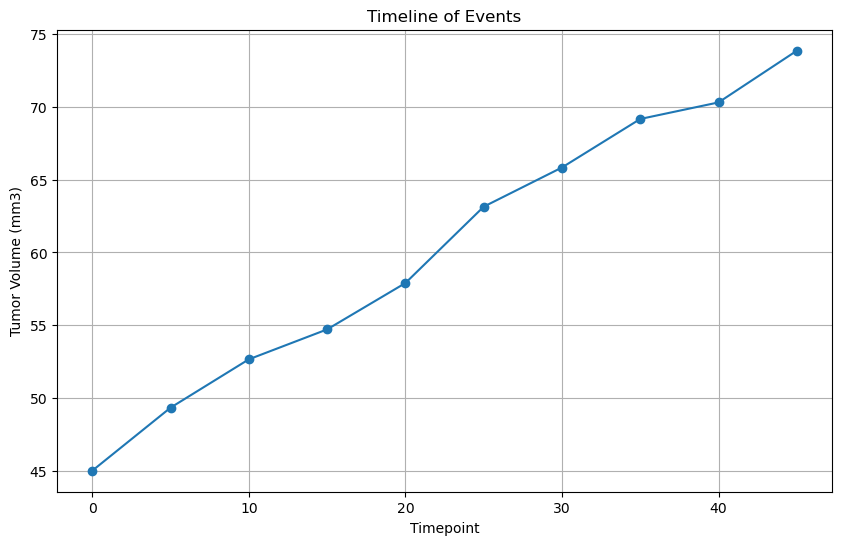

In [77]:

Timepoint=filtered_df['Timepoint']
TumorVolume_mm3=filtered_df['Tumor Volume (mm3)']

# Plot timeline
plt.figure(figsize=(10, 6))
plt.plot(Timepoint, TumorVolume_mm3, marker='o', linestyle='-')

# Add labels and title
plt.title('Timeline of Events')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

# Add annotations for each event
for label, (x, y) in filtered_df.items():
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
#Generate Summary Statistics

unique_drugs=merge_df['Drug Regimen'].unique()
unique_drugs

In [78]:
# A row for each drug regimen. These regimen names should be contained in the index column.
uniquedrugs_df=merge_df.drop_duplicates(subset="Drug Regimen")
uniquedrugs_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.0,0
20,a262,Placebo,Female,17,29,0,45.0,0
30,a275,Ceftamin,Female,20,28,0,45.0,0
40,a366,Stelasyn,Female,16,29,0,45.0,0
47,a401,Zoniferol,Female,8,25,0,45.0,0
57,a411,Ramicane,Male,3,22,0,45.0,0
77,a457,Ketapril,Female,11,30,0,45.0,0
127,a699,Propriva,Female,5,28,0,45.0,0
144,a818,Naftisol,Female,12,28,0,45.0,0
174,b128,Capomulin,Female,9,22,0,45.0,0


In [79]:
# A row for each drug regimen. These regimen names should be contained in the index column.A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.


summary_stats=merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [80]:
#Create Bar Charts and Pie Charts 

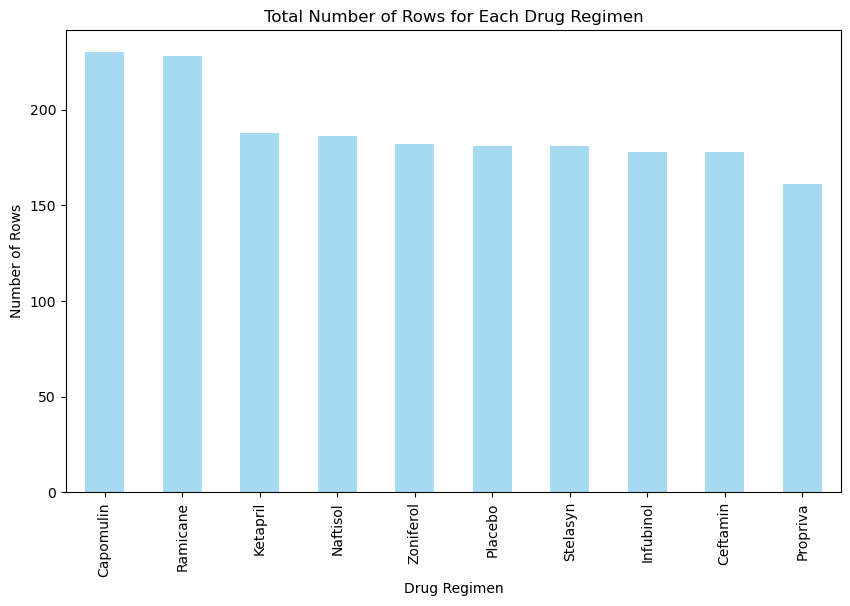

In [81]:
# Group the data by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = merge_df['Drug Regimen'].value_counts()

# Create the bar chart using DataFrame.plot() method
regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=0.75)

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()


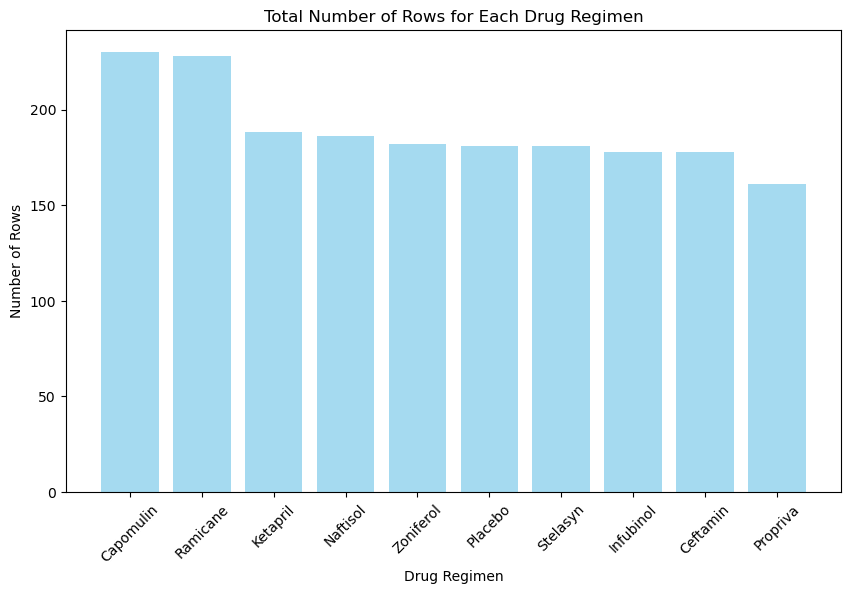

In [82]:
# Group the data by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = merge_df['Drug Regimen'].value_counts()

# Create a bar chart using Matplotlib's pyplot methods
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue', alpha=0.75)

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

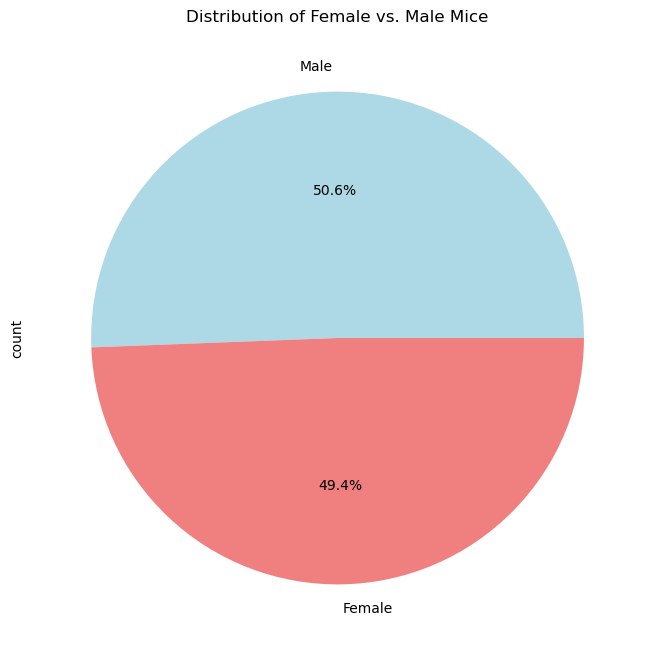

In [83]:
# Group the data by 'Sex' and count the number of mice for each sex
sex_counts = merge_df['Sex'].value_counts()

# Create the pie chart using DataFrame.plot() method
sex_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()


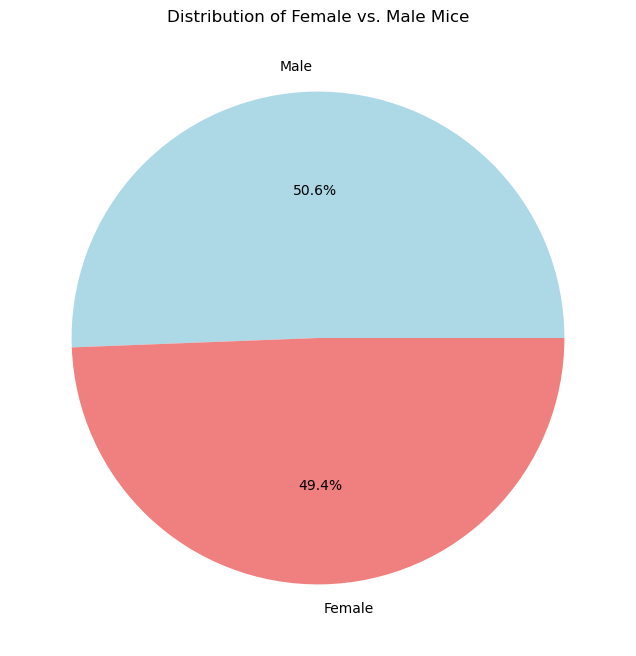

In [84]:
# Group the data by 'Sex' and count the number of mice for each sex
sex_counts = merge_df['Sex'].value_counts()

# Create a pie chart using Matplotlib's pyplot methods
plt.figure(figsize=(8, 8))
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()


In [85]:
# Step 1: Create a grouped DataFrame that shows the last (greatest) time point for each mouse
max_timepoint_df = merge_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this grouped DataFrame with the original cleaned DataFrame
merged_df = pd.merge(merge_df, max_timepoint_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Step 2: Create a list that holds the treatment names
promising_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to hold the tumor volume data
tumor_volume_data = []

# Step 3: Loop through each drug in the treatment list
for treatment in promising_treatments:
    # Locate the rows in the merged DataFrame that correspond to each treatment
    treatment_data = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append the resulting final tumor volumes for each drug to the empty list
    tumor_volume_data.append(treatment_data)

# Step 4: Determine outliers by using the upper and lower bounds
for i, treatment in enumerate(promising_treatments):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.75])
    lower_bound = quartiles[0.25] - (1.5 * (quartiles[0.75] - quartiles[0.25]))
    upper_bound = quartiles[0.75] + (1.5 * (quartiles[0.75] - quartiles[0.25]))
    
    # Print the results
    print(f"Potential outliers for {treatment}:")
    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    print(outliers)


Potential outliers for Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


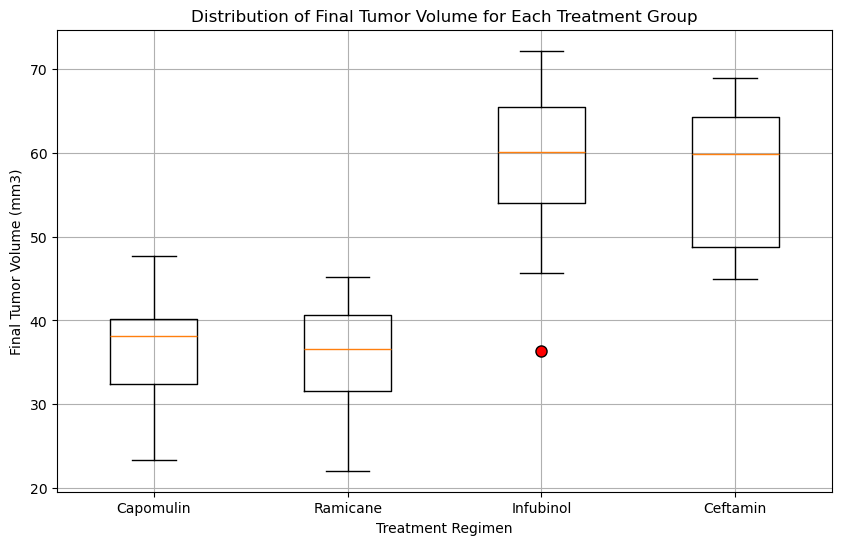

In [86]:
# Create a list to hold tumor volume data for each treatment
tumor_volume_data = []

# Loop through each drug in the treatment list
for treatment in promising_treatments:
    # Locate the rows in the merged DataFrame that correspond to each treatment
    treatment_data = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append the resulting final tumor volumes for each drug to the list
    tumor_volume_data.append(treatment_data)

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=promising_treatments, flierprops=dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none'))

# Add title and labels
plt.title('Distribution of Final Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()

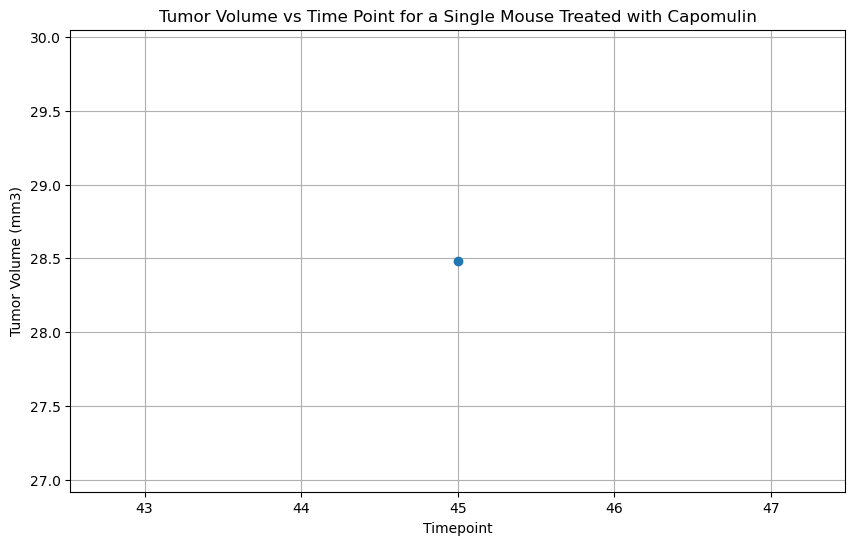

In [87]:
# Select a single mouse treated with Capomulin
capomulin_mouse = merged_df[(merged_df['Drug Regimen'] == 'Capomulin') & (merged_df['Mouse ID'] == 'x401')]

# Plot tumor volume versus time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o', linestyle='-')

# Add title and labels
plt.title('Tumor Volume vs Time Point for a Single Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()

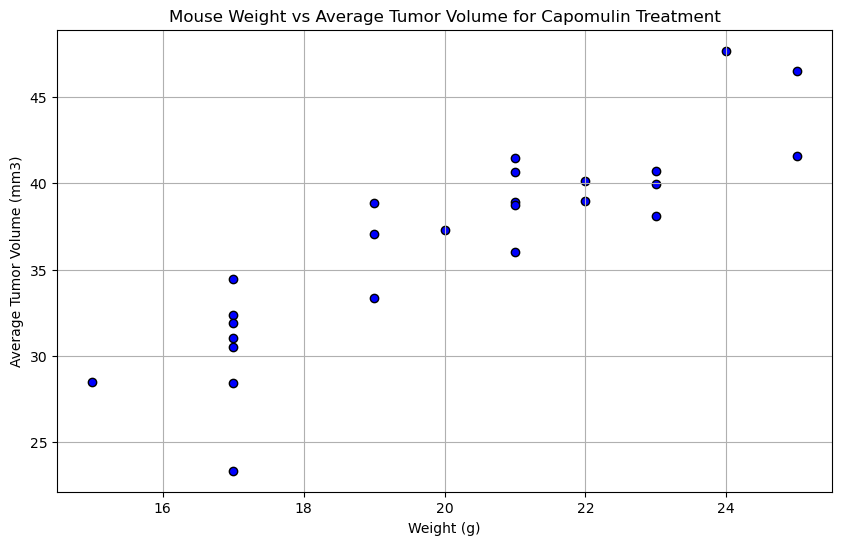

In [88]:
# Calculate average tumor volume for each mouse treated with Capomulin
capomulin_avg_tumor_volume = merged_df[merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get corresponding mouse weight for each mouse treated with Capomulin
capomulin_mouse_weight = merged_df[merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight versus average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

# Add title and labels
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()


Correlation Coefficient: 0.876706040365812


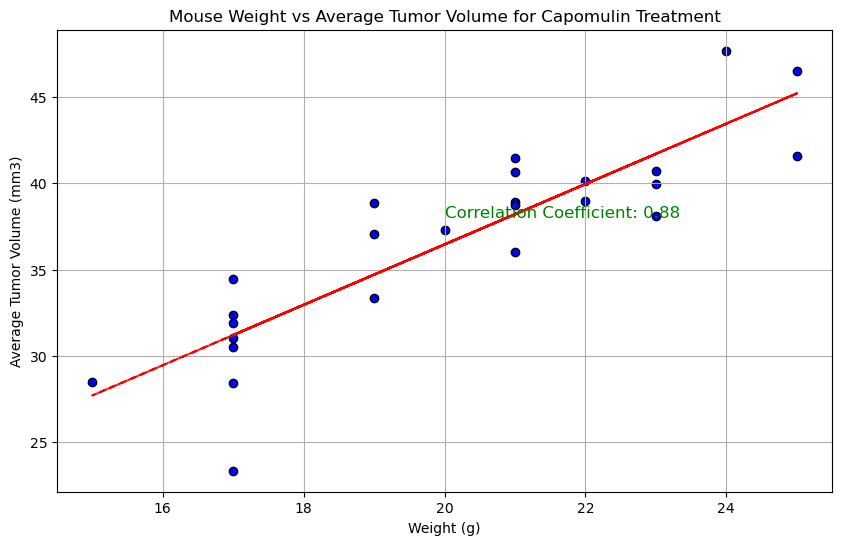

In [89]:
# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(capomulin_mouse_weight, capomulin_avg_tumor_volume)[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression analysis
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_mouse_weight, capomulin_avg_tumor_volume)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

# Plot the linear regression line
plt.plot(capomulin_mouse_weight, slope * capomulin_mouse_weight + intercept, color='red', linestyle='--')

# Add title and labels
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add correlation coefficient to the plot
plt.text(20, 38, f"Correlation Coefficient: {correlation_coefficient:.2f}", fontsize=12, color='green')

# Show plot
plt.grid(True)
plt.show()